### Goal is to run Andrew Ng's lesson 1 using reusable functions. 

# Import Data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import Ex1. Ex1 doesn't have a header, if header = None isn't there it reads first line as header
Ex1 = pd.read_csv('ex1data1.txt', sep=",", header = None)
Ex1.columns = ["population", "profit"]


#Import Ex2.
Ex2 = pd.read_csv('ex1data2.txt', sep=",", header = None)
Ex2.columns = ["SqFt", "Rooms", "Price"]


# Edit data to make X, Y, and Theta matrices

In [89]:
def edit_X (dataset):
    X = dataset.copy()
    X = X.iloc[:,:-1]
    X.insert(0, "Intercept", np.ones((len(dataset),1))) #Adds a list of ones to begining
    X = X.values
    return X
def normalize_X (dataset): # Only if X needs to be normalized.
    X = dataset.copy()
    X = X.iloc[:,:-1]
    X = (X - X.mean())/X.std(ddof = 0) #Normalizes the data
    X.insert(0, "Intercept", np.ones((len(dataset),1))) #Adds a list of ones to begining
    X = X.values
    return X

def edit_Y (dataset):
    Y = dataset.copy()
    Y = Y.iloc[:,-1:]
    Y = Y.values
    return Y
def create_theta(dataset):
    theta = np.zeros((len(dataset.columns),1))
    return theta

# Algorithms for Cost

In [118]:
#Takes inputs of x, y, and theta
def computeCostMulti(x,y,theta):
    m = len(y) 
    hypothesis = x.dot(theta) - y
    return 0.5/m * hypothesis.T.dot(hypothesis)

In [119]:
def gradient_descent(dataset, x, y, theta, alpha, num_iters):
    m = len(y) 
    J_history = []  ##Creates empty set that will be updated each iteration.
    for i in range (num_iters):
        theta -= np.dot(x.transpose(),(x.dot(theta) - y)) * (alpha/m)
        J_history.append(computeCostMulti(x,y,theta))
    return theta, J_history

In [120]:
theta_Ex1, J_history_Ex1 = gradient_descent(Ex1, edit_X(Ex1), edit_Y(Ex1), create_theta(Ex1), 0.01, 1500)
print(theta_Ex1)
#run normalize_X because values are so different.
theta_Ex2, J_history_Ex2 = gradient_descent(Ex2, normalize_X(Ex2), edit_Y(Ex2), create_theta(Ex2), .05, 1500)
print(theta_Ex2)
#note. Ex2 doesn't give "correct" answer, but its the same as what Octave calculates following Andrew's guide.  

[[-3.63029144]
 [ 1.16636235]]
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


# Explore Dataset 1

Text(0, 0.5, "Profit (in 10,000's)")

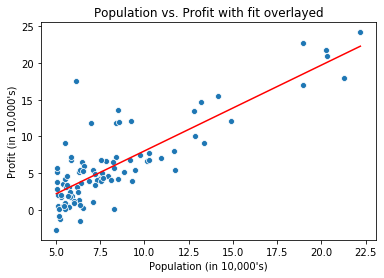

In [59]:
curve = (theta_Ex1[1,0] * Ex1['population']) + theta_Ex1[0,0]
sns.scatterplot(Ex1['population'], Ex1['profit'])
sns.lineplot(Ex1['population'], curve, color = 'r')
#sns.style.use('seaborn')
plt.title('Population vs. Profit with fit overlayed')
plt.xlabel("Population (in 10,000's)")
plt.ylabel("Profit (in 10,000's)")

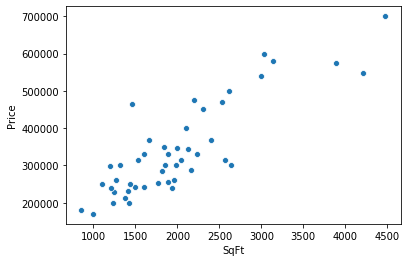

In [60]:
curve = (theta_Ex2[1,0] * Ex2['SqFt']) + theta_Ex1[0,0]
sns.scatterplot(Ex2['SqFt'], Ex2['Price'])

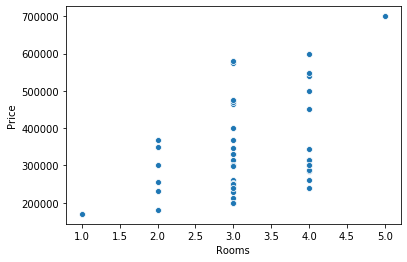

In [61]:
sns.scatterplot(Ex2['Rooms'], Ex2['Price'])